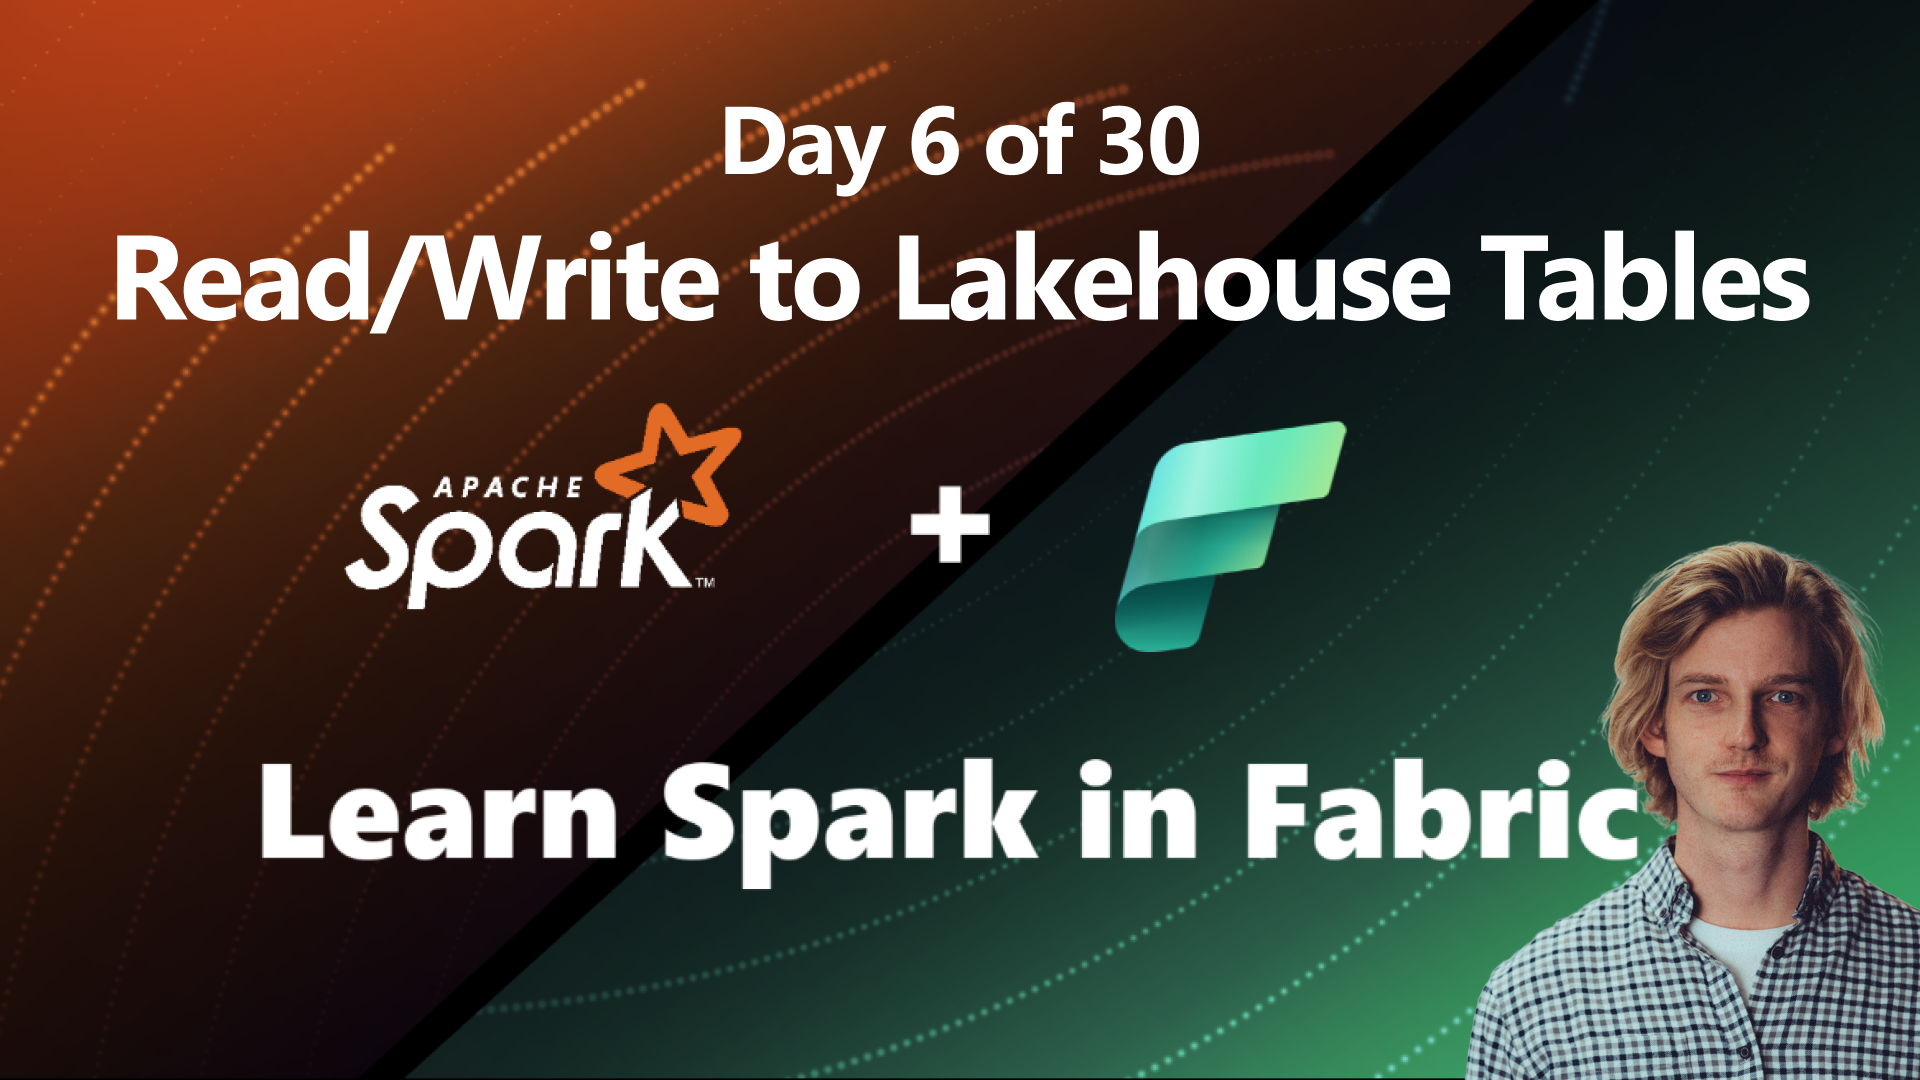

#### Writing from DataFrame to Lakehouse Table

In [2]:
# first, let's get some data 
df = spark.read.json('Files/json/property-sales.json')

display(df) 

StatementMeta(, b1e2ef65-b50f-44d8-9a89-2a73cc718b7b, 4, Finished, Available)

SynapseWidget(Synapse.DataFrame, d73ef8e4-8593-4e93-9dea-5a1e2a25a4f2)

#### Beware of the limitations of Lakehouse column naming
- Read more [here](https://learn.microsoft.com/en-us/fabric/data-engineering/load-to-tables) 

In [3]:
#inspecting the schema 
df.printSchema()

StatementMeta(, b1e2ef65-b50f-44d8-9a89-2a73cc718b7b, 5, Finished, Available)

root
 |-- Address : string (nullable = true)
 |-- Agent: string (nullable = true)
 |-- City : string (nullable = true)
 |-- SalePrice ($): long (nullable = true)
 |-- Type: string (nullable = true)



In [4]:
# changing column names to allow write to Lakehouse tables
df = df.withColumnRenamed("SalePrice ($)","SalePrice_USD")\
        .withColumnRenamed("Address ", "Address")\
        .withColumnRenamed("City ", "City")


StatementMeta(, b1e2ef65-b50f-44d8-9a89-2a73cc718b7b, 6, Finished, Available)

In [5]:
df.printSchema()

StatementMeta(, b1e2ef65-b50f-44d8-9a89-2a73cc718b7b, 7, Finished, Available)

root
 |-- Address: string (nullable = true)
 |-- Agent: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SalePrice_USD: long (nullable = true)
 |-- Type: string (nullable = true)



#### Writing DF to Table, with different 'modes'
Using saveAsTable, we save the DataFrame as a 'Managed Table' (Spark terminology) - meaning both the metadata and the data is managed by Spark.

With a managed table, because Spark manages everything, a SQL command such as DROP TABLE table_name deletes both the metadata and the data. With an unmanaged table, the same command will delete only the metadata, not the actual data.

In [6]:
delta_table_name = 'PropertySales'

# use saveAsTable to save as a Managed Table
df.write.mode("overwrite").format("delta").saveAsTable(delta_table_name)


StatementMeta(, b1e2ef65-b50f-44d8-9a89-2a73cc718b7b, 8, Finished, Available)

**Four different write modes**

In [ ]:
# these are four different write 'modes' 

# append the new dataframe to the existing Table
df.write.mode("append").format("delta").saveAsTable(delta_table_name)

# overwrite existing Table with new DataFrame
df.write.mode("overwrite").format("delta").saveAsTable(delta_table_name)

# Throw error if data already exists
df.write.mode("error").format("delta").saveAsTable(delta_table_name)

# Fail silently if data already exists 
df.write.mode("ignore").format("delta").saveAsTable(delta_table_name)

#### Write to an unmanaged delta table (perhaps for export to external file system/ Databricks/ Snowflake)

In [7]:
# unmanaged table
df.write.mode("overwrite").format("delta").save(path="Files/delta/unmanaged.delta")


StatementMeta(, b1e2ef65-b50f-44d8-9a89-2a73cc718b7b, 9, Finished, Available)

#### Read from Table into DataFrame

In [ ]:
df = spark.sql("SELECT * FROM SparkSeptember.propertysales LIMIT 1000")
display(df)